In [51]:
import numpy as np
import sqlalchemy
from statistics import stdev
from datetime import date
from sqlalchemy.engine import create_engine
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

In [52]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:

# Specify the exact path to your CSV file
file_path = '/content/drive/My Drive/DATA6520 Analytics Consulting and Strategy/Customer Segmentation/Online Retail.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Display the first few rows of the DataFrame to confirm it's loaded correctly
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [54]:
df['Country'].value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [55]:
df['StockCode'].value_counts()

85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
          ... 
21431        1
22275        1
17001        1
90187A       1
72759        1
Name: StockCode, Length: 4070, dtype: int64

In [56]:
df[df['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,8/12/2011 14:51,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,8/12/2011 14:52,-11062.06,NaN,United Kingdom


In [57]:
df[df['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [58]:
df[df['Quantity'] < 0]['InvoiceNo'].str[0:1].value_counts()

C    9288
5    1336
Name: InvoiceNo, dtype: int64

In [59]:
df[(df['Quantity'] < 0) & (df['InvoiceNo'].str[0:1] == '5')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2406,536589,21777,NaN,-10,12/1/2010 16:50,0.0,NaN,United Kingdom
4347,536764,84952C,NaN,-38,12/2/2010 14:42,0.0,NaN,United Kingdom
7188,536996,22712,NaN,-20,12/3/2010 15:30,0.0,NaN,United Kingdom
7189,536997,22028,NaN,-20,12/3/2010 15:30,0.0,NaN,United Kingdom
7190,536998,85067,NaN,-6,12/3/2010 15:30,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535333,581210,23395,check,-26,12/7/2011 18:36,0.0,NaN,United Kingdom
535335,581212,22578,lost,-1050,12/7/2011 18:38,0.0,NaN,United Kingdom
535336,581213,22576,check,-30,12/7/2011 18:38,0.0,NaN,United Kingdom
536908,581226,23090,missing,-338,12/8/2011 9:56,0.0,NaN,United Kingdom


In [60]:
df[df['InvoiceNo'].str[0:1] == 'C']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [61]:
df['InvoiceNo'].str[0:1].value_counts()

5    532618
C      9288
A         3
Name: InvoiceNo, dtype: int64

In [62]:
def stratification(df, col, index):
    df1 = df.pivot_table(col, index = index, aggfunc = np.sum)

    df1 = df1.sort_values(col, ascending = False)
    df1[col + ' Cum'] = df1[col].cumsum()
    df1[col + ' PCT'] = df1[col + ' Cum'] / df1[col + ' Cum'].max()
    bins = [0, 0.5, 0.8, 0.95, 1]
    labels = ['A', 'B', 'C', 'D']
    df1[col + ' Code'] = pd.cut(df1[col + ' PCT'], bins = bins, labels = labels)
    return df1



In [63]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [64]:
#query of total number of missing values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [65]:
#remove rows with missing values in Customer ID field
df1 = df[df['CustomerID'].notnull()]

In [66]:
#let's convert 'InvoiceDate' to a datetime in python
df1['InvoiceDate'] =pd.to_datetime(df1['InvoiceDate']).dt.date

<ipython-input-66-64d030aa9aa5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['InvoiceDate'] =pd.to_datetime(df1['InvoiceDate']).dt.date


In [67]:
print(df1['InvoiceDate'].min(), df1['InvoiceDate'].max())

2010-12-01 2011-12-09


In [133]:
half_time = (df1['InvoiceDate'].max() - df1['InvoiceDate'].min())/2
half_date = df1['InvoiceDate'].max() - half_time
half_date

datetime.date(2011, 6, 6)

In [69]:
df1_time_piv = df1.pivot_table('InvoiceDate', index = 'CustomerID', aggfunc = np.min)

In [70]:
df1_cutoff = df1_time_piv[df1_time_piv['InvoiceDate'] < (half_date)].reset_index()

In [71]:
df1 = df1[df1['CustomerID'].isin(df1_cutoff['CustomerID'].unique())]

In [72]:
df1.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [73]:
df1.describe()

,Quantity,UnitPrice,CustomerID
count,327568.000000,327568.000000,327568.000000
mean,12.812851,3.329296,15296.292455
std,276.006021,31.958259,1720.088095
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13931.000000
50%,6.000000,1.950000,15152.000000
75%,12.000000,3.750000,16813.000000
max,80995.000000,8142.750000,18287.000000


In [74]:
#multiply Unit Price * Quantity to determine extended price for the order item
df1['Extended Price'] = df1['UnitPrice'] * df1['Quantity']


In [75]:
#use stratification function on 'Extended Price' field, with CustomerID as the index
extended_price_segmentation = stratification(df1, 'Extended Price', 'CustomerID')
extended_price_segmentation.round(2)

,Extended Price,Extended Price Cum,Extended Price PCT,Extended Price Code
CustomerID,,,,
14646.0,279489.02,279489.02,0.04,A
18102.0,256438.49,535927.51,0.07,A
17450.0,187482.17,723409.68,0.10,A
14911.0,132572.62,855982.30,0.12,A
12415.0,123725.45,979707.75,0.14,A
...,...,...,...,...
16252.0,-295.09,7187056.76,1.00,D
15823.0,-840.76,7186216.00,1.00,D
12503.0,-1126.00,7185090.00,1.00,D


In [76]:
extended_price_summary = extended_price_segmentation.reset_index().pivot_table(index = 'Extended Price Code',
                              aggfunc = {'CustomerID': 'count', 'Extended Price': np.sum} )
extended_price_summary['CustomerID PCT'] = (extended_price_summary['CustomerID'] / extended_price_summary['CustomerID'].sum()).round(2)
extended_price_summary.round(2)

,CustomerID,Extended Price,CustomerID PCT
Extended Price Code,,,
A,158,3589520.41,0.06
B,617,2161220.95,0.22
C,894,1078497.35,0.32
D,1132,353493.79,0.40


In [77]:
#Next we will look to determine the average order price
#to do this, we will first pivot on CustomerID AND Invoice Number.  Aggregating the Sum of Extended Price gives us each order number.
price_by_customer_order = df1.pivot_table('Extended Price', index = ['CustomerID', 'InvoiceNo'], aggfunc = np.sum).reset_index()
price_by_customer_order

,CustomerID,InvoiceNo,Extended Price
0,12346.0,541431,77183.60
1,12346.0,C541433,-77183.60
2,12347.0,537626,711.79
3,12347.0,542237,475.39
4,12347.0,549222,636.25
...,...,...,...
18712,18283.0,579673,223.61
18713,18283.0,580872,208.00
18714,18287.0,554065,765.28
18715,18287.0,570715,1001.32


In [78]:
#Then, we can pivot again, just on Customer ID, and take the mean extended price.  This will return the average order size by customer
average_order_size = price_by_customer_order.pivot_table('Extended Price', index = 'CustomerID', aggfunc = np.mean).reset_index()
average_order_size

,CustomerID,Extended Price
0,12346.0,0.000000
1,12347.0,615.714286
2,12348.0,449.310000
3,12350.0,334.400000
4,12352.0,140.491818
...,...,...
2796,18273.0,68.000000
2797,18277.0,48.815000
2798,18280.0,180.600000
2799,18283.0,130.930000


In [79]:
#let's change the column names to avoid confusion
average_order_size.columns = ['CustomerID', 'Average Order Size']


In [80]:
#now, let's stratify on average order size
order_size_strat = stratification(average_order_size, 'Average Order Size', 'CustomerID')
order_size_strat.head(15)

,Average Order Size,Average Order Size Cum,Average Order Size PCT,Average Order Size Code
CustomerID,,,,
15749.0,5383.975000,5383.975000,0.006199,A
12415.0,4758.671154,10142.646154,0.011677,A
18102.0,4136.104677,14278.750831,0.016439,A
12435.0,3914.945000,18193.695831,0.020946,A
14646.0,3629.727532,21823.423364,0.025125,A
14088.0,3601.106429,25424.529792,0.029271,A
17450.0,3408.766727,28833.296520,0.033196,A
12590.0,3287.126667,32120.423186,0.036980,A
13135.0,3096.000000,35216.423186,0.040545,A


In [81]:
order_size_summary = order_size_strat.reset_index().pivot_table(index = 'Average Order Size Code',
                              aggfunc = {'CustomerID': 'count', 'Average Order Size': np.mean} )
order_size_summary['CustomerID PCT'] = (order_size_summary['CustomerID'] / order_size_summary['CustomerID'].sum()).round(2)
order_size_summary.round(2)

,Average Order Size,CustomerID,CustomerID PCT
Average Order Size Code,,,
A,674.93,643,0.23
B,289.02,902,0.32
C,173.70,751,0.27
D,77.35,505,0.18


In [82]:
#now, let's look at frequency
#there are a lot of ways to analyze frequency.  To start, let's just take count of orders by customer
order_count = df1.pivot_table('InvoiceNo', index = ['CustomerID'], aggfunc = lambda x: len(x.unique()))
order_count

,InvoiceNo
CustomerID,
12346.0,2
12347.0,7
12348.0,4
12350.0,1
12352.0,11
...,...
18273.0,3
18277.0,2
18280.0,1


In [83]:
#lets' stratify order count
order_count_strat = stratification(order_count, 'InvoiceNo', 'CustomerID')
order_count_strat.columns = ['Order Count', 'Cumulative Orders', 'Order PCT', 'InvoiceNo Code']

In [84]:
order_count_summary = order_count_strat.reset_index().pivot_table(index = 'InvoiceNo Code',
                              aggfunc = {'CustomerID': 'count', 'Order Count': np.sum} )
order_count_summary['CustomerID PCT'] = (order_count_summary['CustomerID'] / order_count_summary['CustomerID'].sum()).round(2)
order_count_summary

,CustomerID,Order Count,CustomerID PCT
InvoiceNo Code,,,
A,394,9356,0.14
B,779,5614,0.28
C,895,2811,0.32
D,733,936,0.26


In [85]:
recency_analysis = df1.pivot_table('InvoiceDate', index = 'CustomerID',
                                   aggfunc = np.max).sort_values('InvoiceDate', ascending = False).reset_index()
bin = [0, .5, .8, .95, 1]
bin2 = [int(x * recency_analysis.index.max()) for x in bin]
bin2

[0, 1400, 2240, 2660, 2800]

In [86]:
conditions = [recency_analysis.index < bin2[1],
              (recency_analysis.index >= bin2[1]) & (recency_analysis.index < bin2[2]),
              (recency_analysis.index >= bin2[2]) & (recency_analysis.index < bin2[3]),
              (recency_analysis.index >= bin2[3])]
values = ['A', 'B', 'C', 'D']
recency_analysis['Recency Code'] = np.select(conditions, values)
recency_analysis = recency_analysis.set_index('CustomerID')
recency_analysis

,InvoiceDate,Recency Code
CustomerID,,
14441.0,2011-12-09,A
14397.0,2011-12-09,A
16954.0,2011-12-09,A
12662.0,2011-12-09,A
16558.0,2011-12-09,A
...,...,...
14142.0,2010-12-01,D
13065.0,2010-12-01,D
13747.0,2010-12-01,D


In [87]:
recency_analysis_summary = recency_analysis.reset_index().pivot_table(index = 'Recency Code',
                              aggfunc = {'CustomerID': 'count', 'InvoiceDate': lambda x: x.mode()} )
recency_analysis_summary['CustomerID PCT'] = (recency_analysis_summary['CustomerID'] / recency_analysis_summary['CustomerID'].sum()).round(2)
recency_analysis_summary

,CustomerID,InvoiceDate,CustomerID PCT
Recency Code,,,
A,1400,2011-12-08,0.50
B,840,2011-10-06,0.30
C,420,2011-03-17,0.15
D,141,2010-12-02,0.05


In [120]:
final = pd.concat([extended_price_segmentation, order_size_strat, order_count_strat, recency_analysis], axis = 1)
final['Concatenate'] = final['Extended Price Code'].astype(str) + final['Average Order Size Code'].astype(str) + final['InvoiceNo Code'].astype(str) + final['Recency Code'].astype(str)

In [121]:
final[['Extended Price', 'Average Order Size', 'Order Count', 'InvoiceDate', 'Concatenate']].sort_values(['Concatenate', 'Extended Price', 'Average Order Size', 'Order Count'], ascending = [True, False, False, False])

,Extended Price,Average Order Size,Order Count,InvoiceDate,Concatenate
CustomerID,,,,,
14646.0,279489.02,3629.727532,77,2011-12-08,AAAA
18102.0,256438.49,4136.104677,62,2011-12-09,AAAA
17450.0,187482.17,3408.766727,55,2011-12-01,AAAA
14911.0,132572.62,534.567016,248,2011-12-08,AAAA
12415.0,123725.45,4758.671154,26,2011-11-15,AAAA
...,...,...,...,...,...
12666.0,-227.44,-227.440000,1,2010-12-15,DDDD
16252.0,-295.09,-295.090000,1,2010-12-08,DDDD
15823.0,-840.76,-420.380000,2,2011-01-06,DDDD


In [122]:
# Replace characters in the column with their numerical values
final['NumericalValue'] = final['Concatenate'].str.replace('A', '3')
final['NumericalValue'] = final['NumericalValue'].str.replace('B', '2')
final['NumericalValue'] = final['NumericalValue'].str.replace('C', '1')
final['NumericalValue'] = final['NumericalValue'].str.replace('D', '0')
final['Value'] = final['NumericalValue'].str[0].astype(int) + final['NumericalValue'].str[1].astype(int) + final['NumericalValue'].str[2].astype(int) + final['NumericalValue'].str[3].astype(int)
final

,Extended Price,Extended Price Cum,Extended Price PCT,Extended Price Code,Average Order Size,Average Order Size Cum,Average Order Size PCT,Average Order Size Code,Order Count,Cumulative Orders,Order PCT,InvoiceNo Code,InvoiceDate,Recency Code,Concatenate,NumericalValue,Value
CustomerID,,,,,,,,,,,,,,,,,
14646.0,279489.02,279489.020,0.038879,A,3629.727532,21823.423364,0.025125,A,77,1338,0.071486,A,2011-12-08,A,AAAA,3333,12
18102.0,256438.49,535927.510,0.074551,A,4136.104677,14278.750831,0.016439,A,62,1680,0.089758,A,2011-12-09,A,AAAA,3333,12
17450.0,187482.17,723409.680,0.100631,A,3408.766727,28833.296520,0.033196,A,55,1795,0.095902,A,2011-12-01,A,AAAA,3333,12
14911.0,132572.62,855982.300,0.119072,A,534.567016,281980.969940,0.324644,A,248,248,0.013250,A,2011-12-08,A,AAAA,3333,12
12415.0,123725.45,979707.750,0.136283,A,4758.671154,10142.646154,0.011677,A,26,4476,0.239141,A,2011-11-15,A,AAAA,3333,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16252.0,-295.09,7187056.762,0.999762,D,-295.090000,866923.242026,0.998086,D,1,18575,0.992413,D,2010-12-08,D,DDDD,0000,0
15823.0,-840.76,7186216.002,0.999645,D,-420.380000,866502.862026,0.997602,D,2,18089,0.966448,D,2011-01-06,D,DDDD,0000,0
12503.0,-1126.00,7185090.002,0.999488,D,-1126.000000,865376.862026,0.996305,D,1,18381,0.982048,D,2011-01-06,D,DDDD,0000,0


In [124]:
conditions = [final['Value'] >= 9,
              (final['Value'] < 9) & (final['Value'] >= 6),
              (final['Value'] < 6) & (final['Value'] >= 3),
              final['Value'] < 3]
values = ['A', 'B', 'C', 'D']
final['Category'] = np.select(conditions, values)
final

,Extended Price,Extended Price Cum,Extended Price PCT,Extended Price Code,Average Order Size,Average Order Size Cum,Average Order Size PCT,Average Order Size Code,Order Count,Cumulative Orders,Order PCT,InvoiceNo Code,InvoiceDate,Recency Code,Concatenate,NumericalValue,Value,Category
CustomerID,,,,,,,,,,,,,,,,,,
14646.0,279489.02,279489.020,0.038879,A,3629.727532,21823.423364,0.025125,A,77,1338,0.071486,A,2011-12-08,A,AAAA,3333,12,A
18102.0,256438.49,535927.510,0.074551,A,4136.104677,14278.750831,0.016439,A,62,1680,0.089758,A,2011-12-09,A,AAAA,3333,12,A
17450.0,187482.17,723409.680,0.100631,A,3408.766727,28833.296520,0.033196,A,55,1795,0.095902,A,2011-12-01,A,AAAA,3333,12,A
14911.0,132572.62,855982.300,0.119072,A,534.567016,281980.969940,0.324644,A,248,248,0.013250,A,2011-12-08,A,AAAA,3333,12,A
12415.0,123725.45,979707.750,0.136283,A,4758.671154,10142.646154,0.011677,A,26,4476,0.239141,A,2011-11-15,A,AAAA,3333,12,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16252.0,-295.09,7187056.762,0.999762,D,-295.090000,866923.242026,0.998086,D,1,18575,0.992413,D,2010-12-08,D,DDDD,0000,0,D
15823.0,-840.76,7186216.002,0.999645,D,-420.380000,866502.862026,0.997602,D,2,18089,0.966448,D,2011-01-06,D,DDDD,0000,0,D
12503.0,-1126.00,7185090.002,0.999488,D,-1126.000000,865376.862026,0.996305,D,1,18381,0.982048,D,2011-01-06,D,DDDD,0000,0,D


In [125]:
#conditions = [final['Concatenate'].str.count('A') == 4,
#              final['Concatenate'].str.count('A') == 3,
#              final['Concatenate'].str.count('A') == 2,
#              final['Concatenate'].str.count('B') == 4,
#              final['Concatenate'].str.count('B') == 3,
#              final['Concatenate'].str.count('B') == 2,
#              final['Concatenate'].str.count('C') == 4,
#              final['Concatenate'].str.count('C') == 3,
#              final['Concatenate'].str.count('C') == 2,
#              final['Concatenate'].str.count('D') >= 2,
#              final['Concatenate'].str.count('C') >= 1]
#values = ['A1', 'A2', 'A3', 'B1', 'B2', 'B3', 'C1', 'C2', 'C3', 'D', 'D']
#final['Category'] = np.select(conditions, values)

In [126]:
#final.head()

In [127]:
df_cluster = final.reset_index()[['Extended Price', 'Average Order Size', 'Order Count']]

In [128]:
df_cluster

,Extended Price,Average Order Size,Order Count
0,279489.02,3629.727532,77
1,256438.49,4136.104677,62
2,187482.17,3408.766727,55
3,132572.62,534.567016,248
4,123725.45,4758.671154,26
...,...,...,...
2796,-295.09,-295.090000,1
2797,-840.76,-420.380000,2
2798,-1126.00,-1126.000000,1
2799,-1165.30,-233.060000,5


In [129]:
# Number of clusters
k = 3  # Example value

# Creating the KMeans model
kmeans = KMeans(n_clusters=k)

# Fitting the model
kmeans.fit(df_cluster)

# Adding the cluster IDs to your original DataFrame
df_cluster['Cluster'] = kmeans.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


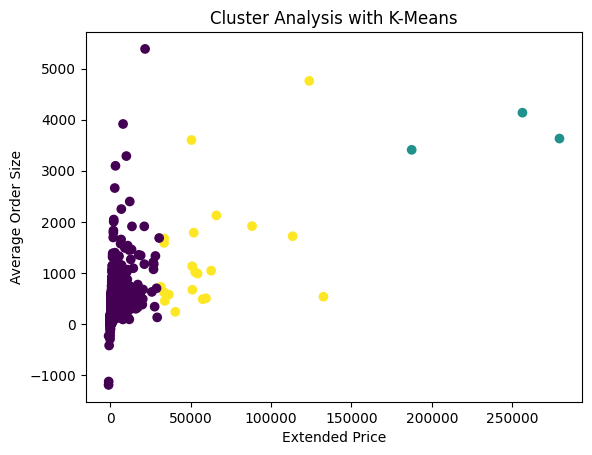

In [130]:

# If your data is two-dimensional, you can visualize the clusters
plt.scatter(df_cluster['Extended Price'], df_cluster['Average Order Size'], c=df_cluster['Cluster'], cmap='viridis')
plt.xlabel('Extended Price')
plt.ylabel('Average Order Size')
plt.title('Cluster Analysis with K-Means')
plt.show()


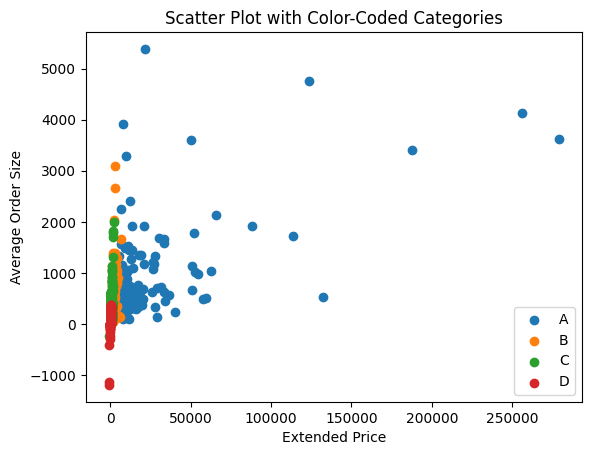

In [131]:
import pandas as pd
import matplotlib.pyplot as plt

# Unique categories
categories = final['Category'].unique()

# Plot each category with a different color and label
for category in categories:
    subset = final[final['Category'] == category]
    plt.scatter(subset['Extended Price'], subset['Average Order Size'], label=category)

# Adding labels and title
plt.xlabel('Extended Price')
plt.ylabel('Average Order Size')
plt.title('Scatter Plot with Color-Coded Categories')

# Display the legend
plt.legend()

# Show the plot
plt.show()


In [132]:
df1.merge(final.reset_index()[['CustomerID', 'Category']], on = 'CustomerID', how = 'left').to_excel('/content/drive/My Drive/DATA6520 Analytics Consulting and Strategy/Customer Segmentation/customer_segmentation.xlsx')